In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [2]:
# Importing the dataset
titanic_data = pd.read_csv("titanic_train.csv")

In [3]:
# Checking for null values
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Fills all of the blank data, I need to remember that I removed all passengers without an age, so that if I work with age, 
# I need to remember how that could affect the data.
titanic_data['Cabin'] = titanic_data['Cabin'].fillna('?')
titanic_data['Embarked'] = titanic_data['Embarked'].fillna('?')
titanic_data = titanic_data.dropna()

In [5]:
# All of the data has been filled in, so there aren't any holes.
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        714 non-null    object 
 11  Embarked     714 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [6]:
# Checking the number of duplicates, as it is zero I don't need to do anything about it.
print("Amount of Duplicates:",titanic_data.duplicated().sum())

Amount of Duplicates: 0


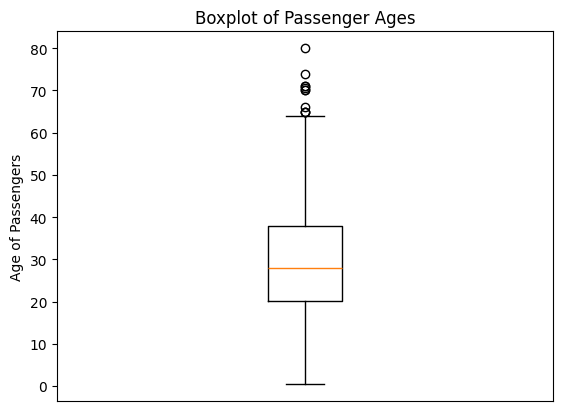

In [7]:
# This all generates a boxplot of the distribution of ages, you can see that the median value is around 30 and 
# there are several outliers at the upper end of the data.
age = titanic_data["Age"]
plt.boxplot(age)
plt.xticks([])
plt.ylabel("Age of Passengers")
plt.title("Boxplot of Passenger Ages")
plt.savefig("boxplot.png")

Embarked
S    554
C    130
Q     28
?      2
Name: count, dtype: int64


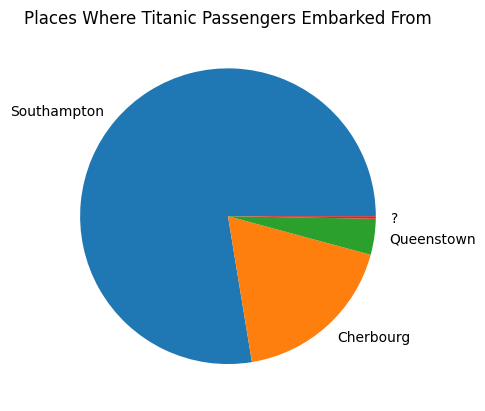

In [8]:
# This all generates a pie chart of where titanic passengers embarked from. As you can see, the vast majority 
# departed from Southampton, a significant amount from Cherbourg, some from Queenstown, and a couple that we don't know.
embarked = titanic_data["Embarked"].value_counts()
print(embarked)
plt.pie(embarked, labels=["Southampton", "Cherbourg", "Queenstown", "?"])
plt.title("Places Where Titanic Passengers Embarked From")
plt.savefig("pie.png")

In [12]:
# This creates a contingency table and performs a chi-squared test on it, leading to a p-value of
# around 0.007, since this is less than 0.05, the data is determined to be significant.
embarked_by_sex = pd.crosstab(titanic_data["Embarked"], titanic_data["Sex"])
print(embarked_by_sex)
c, p, dof, expected = scipy.stats.chi2_contingency(embarked_by_sex)
print("P-value:", p)

Sex       female  male
Embarked              
?              2     0
C             61    69
Q             12    16
S            186   368
P-value: 0.007051637315041493


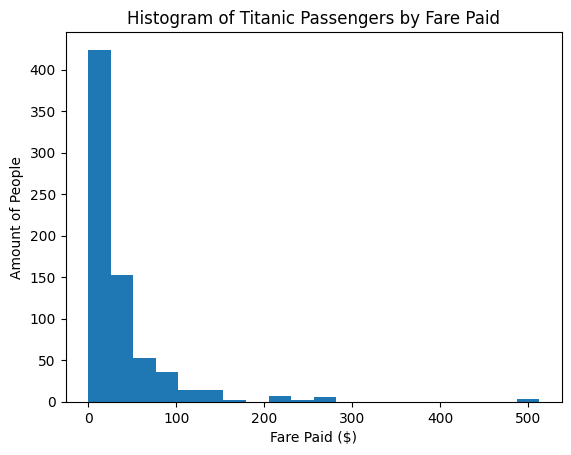

In [13]:
# This creates a histogram of the fare column of the data with 20 bins.
plt.hist(titanic_data["Fare"], bins = 20)
plt.xlabel("Fare Paid ($)")
plt.ylabel("Amount of People")
plt.title("Histogram of Titanic Passengers by Fare Paid")
plt.savefig("histogram.png")

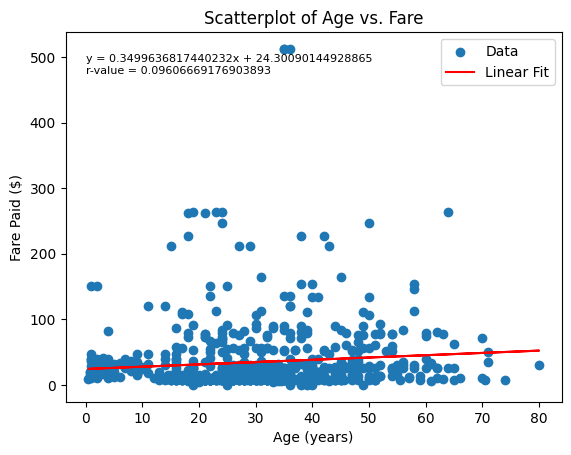

In [14]:
# This creates a scatter plot of the age and fare columns of the dataframe, calculates some statistics, and displays them.
fare = titanic_data["Fare"]
age = titanic_data["Age"]
linear_model = scipy.stats.linregress(age, fare)
slope = linear_model.slope
intercept = linear_model.intercept
r_value = linear_model.rvalue
linear_fit = slope*age+intercept
plt.scatter(age, fare, label = "Data")
plt.plot(age, linear_fit, c="red", label = "Linear Fit")
plt.xlabel("Age (years)")
plt.ylabel("Fare Paid ($)")
plt.title("Scatterplot of Age vs. Fare")
plt.legend()
plt.text(0, 475, "y = 0.3499636817440232x + 24.30090144928865 \nr-value = 0.09606669176903893", fontsize = 8)
plt.savefig("scatter.png")